# Numerical analysis of the Steinberg signature on the 3-vertex graph $K$. 

# Haque, Çetiner, Gunawardea 2024. _Anomalous behavior of the Steinberg signature for detecting departure from thermodynamic equilibrium._

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from steinberg_utils_3vertex import *

# Plot features

In [3]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

In [4]:
# hex codes

# black
black = '#000000'

# strawberry pink (A^{13})
strawberrypink = '#FF3D6E'

# sky blue (A^{31})
skyblue = '#4599DF'

# Sampling parameters for the 3-vertex graph $K$

![My Image](steinberg_figure_1.png)

Parameters are defined as $10^x$, where $x$ is uniformly sampled from $(-3, 3)$. The user can specify the endpoints of this range to sample parameter space more broadly, but $-3$ and $3$ are set as the default parameters.

In [32]:
params = random_parameters()

The parameters can be determined such that they satisfy the cycle condition on $K$, initializing the graph in an equlibrium steady state.

In [33]:
#params = equilibrium_parameters()

To generate the figure in the paper, we will manually assign values for the edge labels of the 3-vertex graph. The parameters for the 3-vertex graph are listed in the following order: $[a, b, d, c, f, e]$

In [34]:
#params = [0.00206, 2.69641, 0.2113, 0.58195, 0.35186, 0.0015]

Next, we compute the Laplacian matrix $\mathcal{L}(K)$ for this specific parameterzation of $K$, and the steady state distribution $\pi(K)$ as computed through the Matrix-Tree Theorem.

In [35]:
L = Laplacian_K(params)
print(L)

[[-1.55732941e+00  6.96554406e-01  2.22515753e-03]
 [ 1.02120757e+00 -6.98624586e-01  7.77040262e+01]
 [ 5.36121842e-01  2.07018074e-03 -7.77062514e+01]]


In [36]:
pi = steady_state_MTT_K(params)
print(pi)

[0.30838518 0.6894688  0.00214602]


We can also calculate the cycle affinity $\tilde{A}(C)$ for $K$. The cycle affinity  quantifies the departure from equilibrium that arises from the cycle $C$. We take the absolute value of the cycle affinity in our calculation.

In [37]:
cycle_affinity_K(params)

15.634964976281770813

# Numerical calculation of the autocorrelation function $\mathcal{A}^{\alpha,\beta}(\tau)$

Recall the linear framework formula for the asymmetric autocorrelation function $\mathcal{A}^{\alpha,\beta}(\tau)$, specified in the text by Eq. 20,

$$ \mathcal{A}^{\alpha,\beta} (\tau) = (S^\beta)^T \cdot \exp\left (\mathcal{L}(G) \tau \right ) \cdot \Delta \left ( u^*(G) \right ) \cdot S^\alpha $$

where $S$ denotes the column vector $S = \left ( S(1), \cdots , S(N) \right )^T$ and $S^k$ is taken component-wise. The Steinberg signature exploits the discrepancy between $\mathcal{A}^{\alpha,\beta} (\tau)$ and $\mathcal{A}^{\beta,\alpha} (\tau) = \mathcal{A}^{\alpha,\beta}_r (\tau)$ to detect whether a stochastic system is away from thermodynamic equilibrium. To assess the efficacy of the Steinberg signature, we must be able to compute the autocorrelation function numerically.

Let us define the values of our stochastic signal $f(t)$. Here, we define $f(t)$ so it takes one of the values $S(1) = 3, S(2) = 5, S(3) = 7$ when the system occupies state $1$, $2$, or $3$, respectively. We also take $\alpha = 1$ and $\beta = 3$, as in the text.

In [38]:
signal = [3, 5, 7]
alpha = 1
beta = 3

Next, we set a range for the $\tau$ values -- this range can be altered depending on the shape of the autocorrelation functions. Recall that $\mathcal{A}^{\alpha,\beta}(0) = \mathcal{A}^{\beta, \alpha}(0) = \langle S^{\beta + \alpha} \rangle$ and $\lim_{\tau \to \infty} \mathcal{A}^{\alpha,\beta}(\tau) = \lim_{\tau \to \infty} \mathcal{A}^{\alpha,\beta}(\tau) = \langle S^\beta \rangle \langle S^\alpha \rangle$.

In [39]:
tau = np.around(np.arange(0.01,4.0,step=.01), decimals = 2)

We can now numerically compute the asymmetric autocorrelation functions by taking all the above defined quantities and plugging them into the formula reproduced above. The function `asymmetric_autocorrelation` performs this calculation for us.

In [40]:
a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha,beta)

In [41]:
area = numerical_area(a_13, a_31)
area

22.434996886050186049

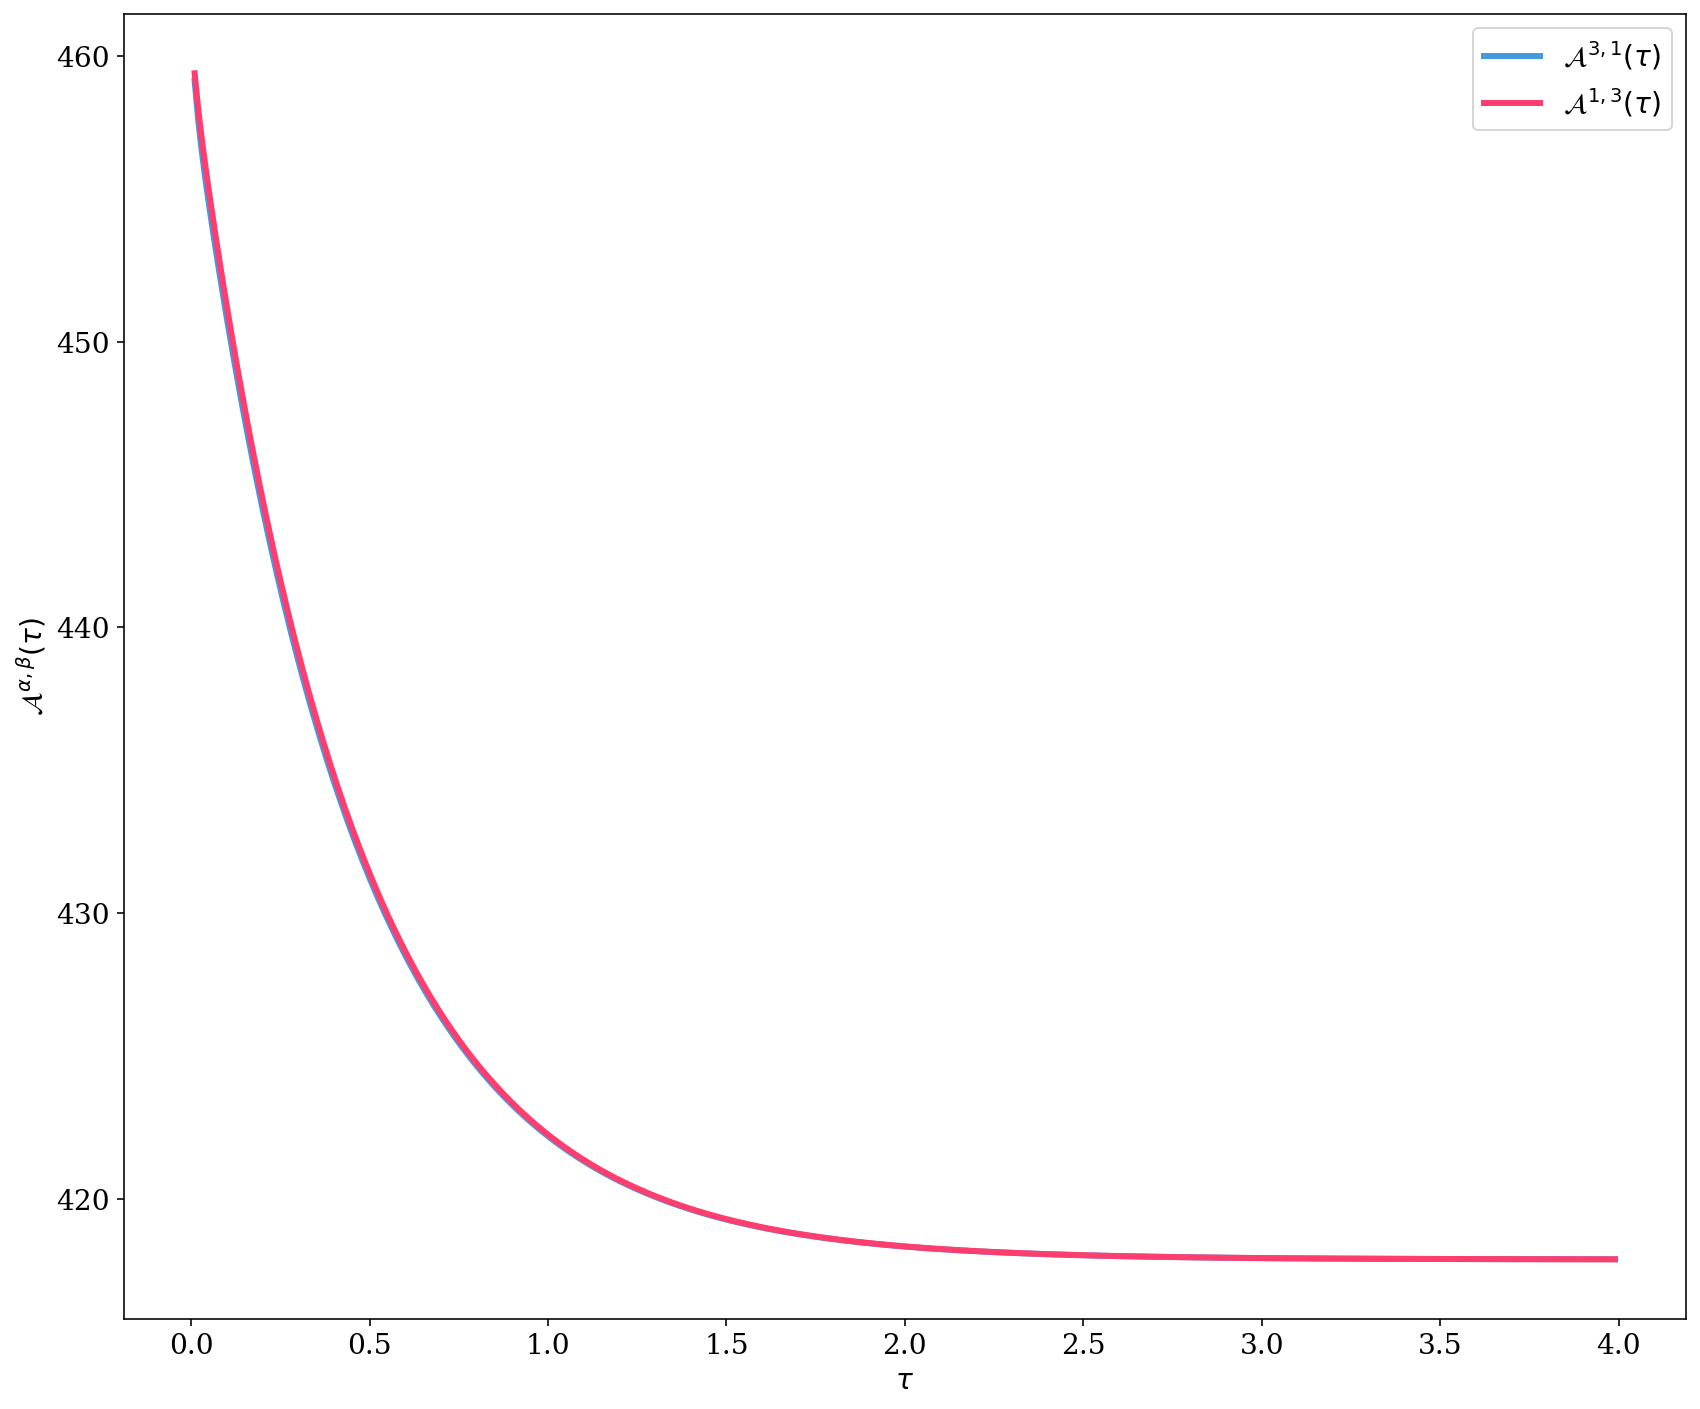

In [42]:
fig = plt.figure()
plt.plot(tau,a_13,label=r'$\mathcal{A}^{3,1}(\tau)$',linewidth=3, c= skyblue)
plt.plot(tau,a_31,label=r'$\mathcal{A}^{1,3}(\tau)$',linewidth=3,color=strawberrypink)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\mathcal{A}^{\alpha,\beta}(\tau)$")
plt.legend()
plt.show()
fig.savefig('figure_3A_legend.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')

# The Steinberg signature $\mathcal{I}^{1,3}(G)$ in response to increasing entropy production

We can think of the area difference between $\mathcal{A}^{\alpha,\beta}(\tau)$ and $\mathcal{A}^{\beta,\alpha}(\tau)$ as an indirect measure of quantifying the Steinberg signature, given in the text by Eq. 30,

$$ \mathcal{I}^{\alpha,\beta}(G) = \int_0^\infty \left ( \mathcal{A}^{\alpha,\beta}(\tau) - \mathcal{A}^{\beta,\alpha}(\tau) \right ) d \tau .$$

We call $\mathcal{I}^{\alpha,\beta}(G)$ the Steinberg signature for a given linear framework graph $G$ and signals $S(i)$. The goal of the present work is to assess the mathematical behavior of $\mathcal{I}^{\alpha,\beta}(G)$ and evaluate its efficacy as a signature of departure from equilibrium. In this section, we will investigate how the Steinberg signature behaves in response to increasing entropy production in the underlying system. We look into this by initializing $K$ in an equilibrium steady state, then selecting a single transition rate in $K$ to increase from its equilibrium value. We can then plot the value of the Steinberg signature against the value of the cycle affinity as it increases from $0$ to observe how the Steinberg signature varies in response to increasing entropy production. 

In the paper, we derive several analytical formulas for $\mathcal{I}^{\alpha,\beta}(G)$. Here, we numerically estimate $|\mathcal{I}^{\alpha,\beta}(G)|$ both by using the Python functions for computing the area underneath the curve and by using the spectral formulas for $\mathcal{I}^{\alpha,\beta}(G)$ supplied in Eq. 32.

First, we define the starting parameters for $K$.

In [1]:
params = equilibrium_parameters()
cycle_affinity_K(params)

NameError: name 'equilibrium_parameters' is not defined

As before, we manually define the starting equilibrium parameterization to recreate Figure 3B in the paper.

In [15]:
params = [8.8154536, 7.20897351, 5.83306234, 0.59209293, 8.77612202, 0.72849181]
cycle_affinity_K(params)

5.718925793740141e-09

We next define the conditions for calculating the higher-order autocorrelation functions as above. We also will initialize arrays for storing information about the cycle affinity and the Steinberg signature. Let us choose to perturb the chosen parameter 2000 times (such that K is driven very far away from equilibrium).

In [18]:
signal = [3,5,7]
tau = np.around(np.arange(0.01,2.0,step=.01), decimals = 2)
alpha = 1
beta = 3

num_perturbations = 2000

In [19]:
# arrays for force/area tracking
entropy_production = np.zeros(num_perturbations)
steinberg_area = np.zeros(num_perturbations)

We can compute the area between $\mathcal{A}^{1,3}(\tau)$ and $\mathcal{A}^{3,1}(\tau)$ numerically using the Python functions for the area under the curve. This function takes the absolute value of the area function.

In [415]:
area = numerical_area(a_13,a_31)
area

1634.4749826598267077

In [ ]:
for i in tqdm(range(1,num_perturbations)):
    params[param_choice] = params[param_choice]*1.01

    affinities[i] = cycle_affinity_K(params)

    L = Laplacian_K(params)
    pi = steady_state_MTT(params)

    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)

    areas[i] = numerical_area(a_13,a_31)

In [14]:
num_simulations = 6
num_perturbations = 2000
num_params = 6

mega_affinities = np.zeros((num_simulations,num_perturbations))
mega_areas = np.zeros((num_simulations,num_perturbations))
param_choices = np.arange(0,6)

In [15]:
for j in range(num_simulations):
    
    # arrays for force/area tracking
    affinities = np.zeros(num_perturbations)
    areas = np.zeros(num_perturbations)
    
    # reset the initial equilibrium parameters
    params = [8.8154536, 7.20897351, 5.83306234, 0.59209293, 8.77612202, 0.72849181]
    
    # determine which parameter to perturb from its equilibrium value
    param_choice = param_choices[j]
    
    # equilibrium conditions
    affinities[0] = cycle_affinity_K(params)
    L = Laplacian_K(params)
    pi = steady_state_MTT(params)
    
    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)
    areas[0] = numerical_area(a_13, a_31)
    
    for i in tqdm(range(1,num_perturbations)):
        params[param_choice] = params[param_choice]*1.01

        affinities[i] = cycle_affinity_K(params)

        L = Laplacian_K(params)
        pi = steady_state_MTT(params)

        a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha=1,beta=3)

        areas[i] = numerical_area(a_13,a_31)
    
    mega_affinities[j,] = affinities
    mega_areas[j,] = areas

100%|███████████████████████████████████████| 1999/1999 [03:32<00:00,  9.42it/s]


In [16]:
colors = [black, strawberrypink, skyblue]

In [17]:
idx = np.argmax(mega_areas,axis=1)
print(idx)
print(mega_areas[np.arange(num_simulations), idx])
print(mega_affinities[np.arange(num_simulations), idx])

[141 130 104 266  97 259]
[17.81377783 15.4253533  10.50005619 76.39676393  9.37993193 70.45882645]
[1.40299664 1.29354302 1.0348344  2.64678801 0.9651821  2.57713569]


In [18]:
paramchoice_labels = ['a','b','d','c','f','e']

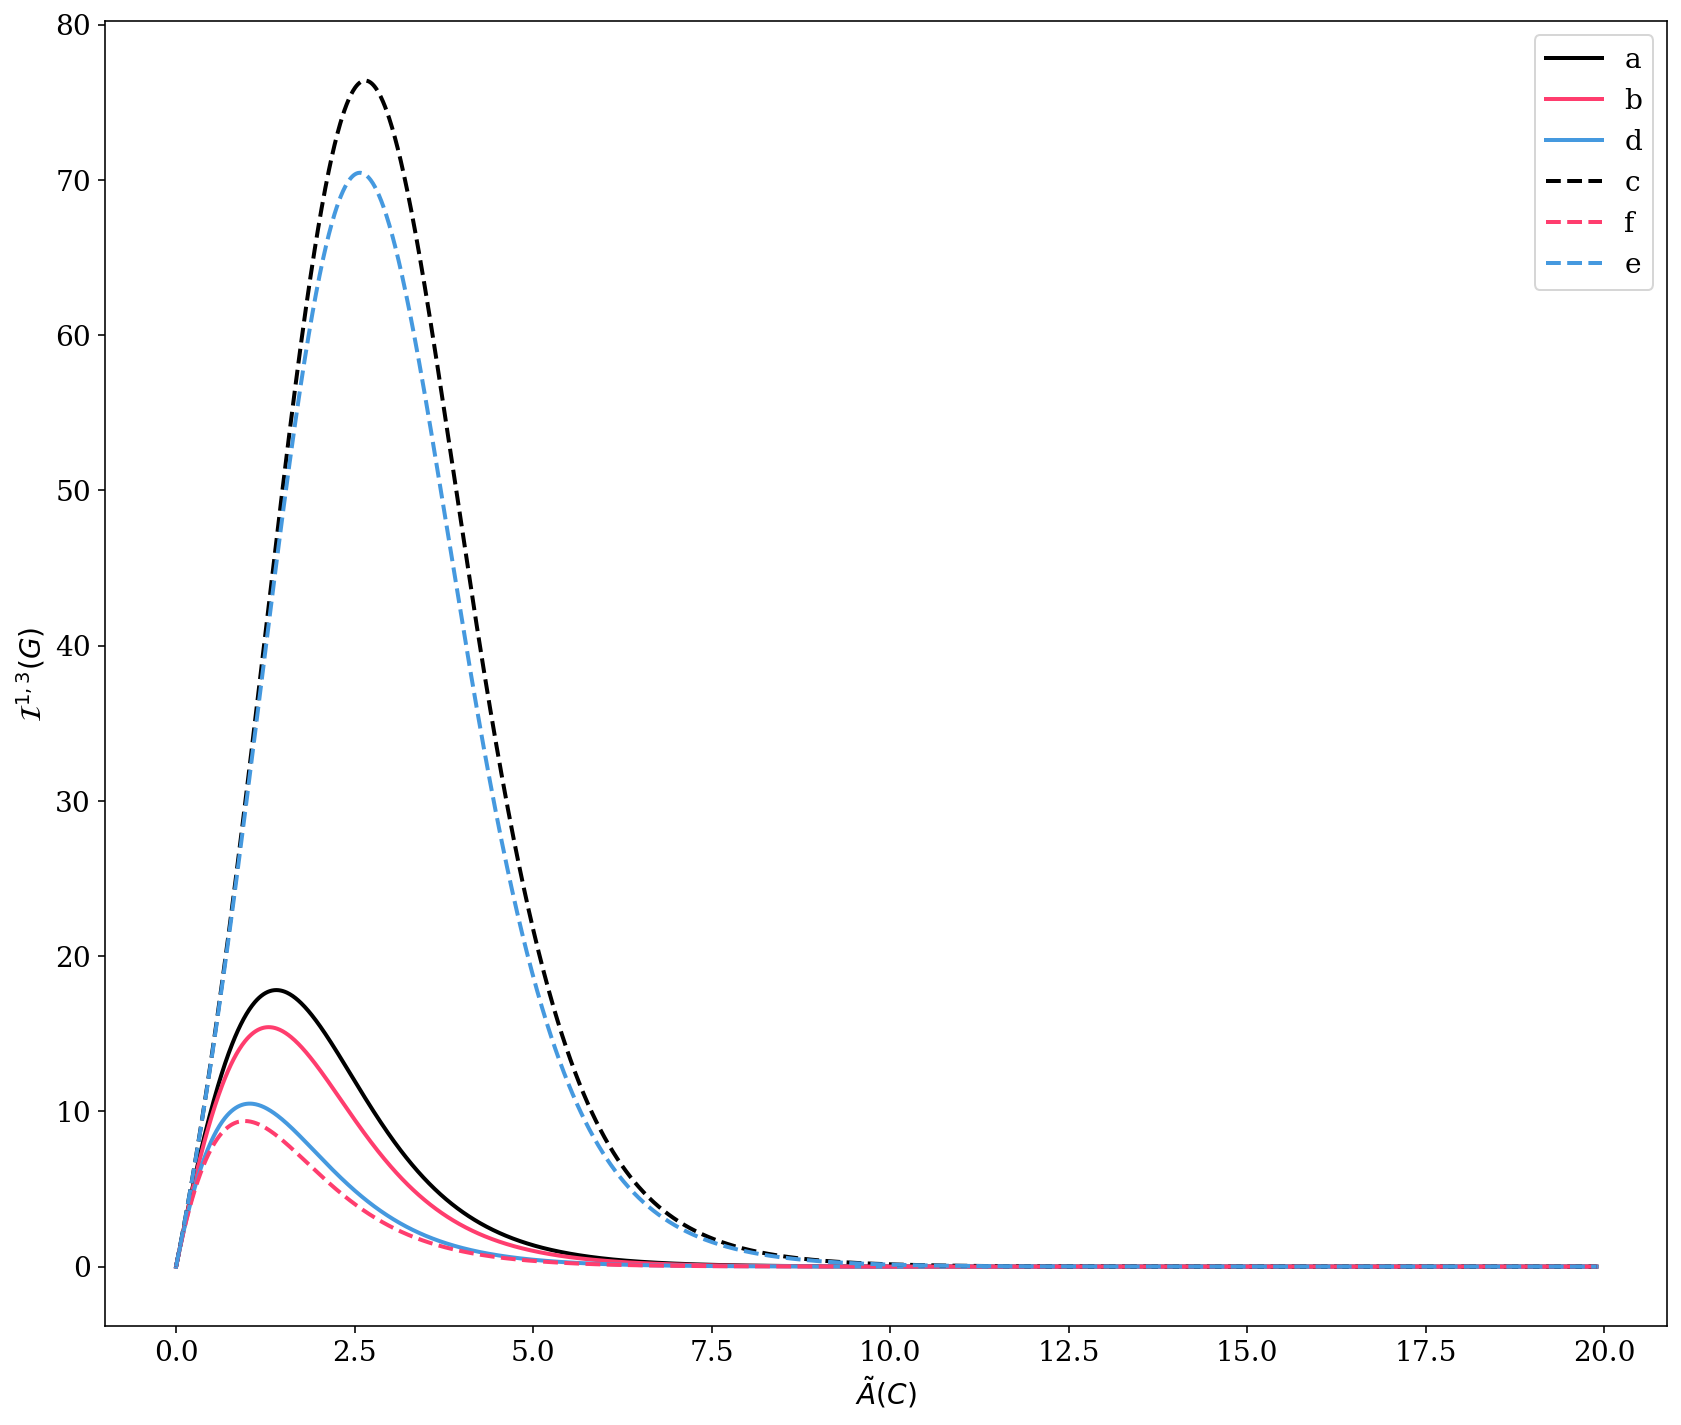

In [19]:
fig, ax = plt.subplots(figsize = (14, 12))
for i in range(0,3):
    plt.plot(mega_affinities[i,:], mega_areas[i,:],label=(paramchoice_labels[i]),color = colors[i],linewidth=2)
    
for i in range(3,6):
    plt.plot(mega_affinities[i,:], mega_areas[i,:], '--', label=(paramchoice_labels[i]),color = colors[i-3],linewidth=2)
    
plt.legend()
plt.xlabel(r"$\tilde{A}(C)$")
plt.ylabel(r"$\mathcal{I}^{1,3}(G)$")
plt.show()
fig.savefig('forcearea-1-allparams-redone.pdf', dpi = 900, bbox_inches='tight',facecolor=fig.get_facecolor(), edgecolor='none')